<a href="https://colab.research.google.com/github/bowie0713/DS-Project-1/blob/main/Three_Point_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import copy
import seaborn as sns

In [2]:
nba_df = pd.read_csv("NBA three point stats baseball ref.csv")
nba_df.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2022-23,NBA,26.1,6-Jun,216.0,1145,241.8,41.9,88.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,2,2021-22,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2020-21,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2019-20,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2018-19,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


In [3]:
# nba_df['Season'] = ['2022','2021','2020','2019','2018','2017', '']
nba_df['Season'] = np.arange(start = 2023, stop = 1946, step = -1) # change 'Season' column into a single number instaed of a 2022-2023
nba_df

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2023,NBA,26.1,6-Jun,216.0,1145,241.8,41.9,88.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,2,2022,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2021,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2020,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2019,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,1951,NBA,NaN,NaN,NaN,354,NaN,29.8,83.6,...,84.1,0.357,NaN,0.733,NaN,0.357,NaN,NaN,0.293,NaN
73,74,1950,NBA,NaN,NaN,NaN,561,NaN,28.2,83.1,...,80.0,0.340,NaN,0.714,NaN,0.340,NaN,NaN,0.284,NaN
74,75,1949,BAA,NaN,NaN,NaN,360,NaN,29.0,88.7,...,80.0,0.327,NaN,0.703,NaN,0.327,NaN,NaN,0.248,NaN
75,76,1948,BAA,NaN,NaN,NaN,192,NaN,27.2,96.0,...,72.7,0.284,NaN,0.675,NaN,0.284,NaN,NaN,0.190,NaN


Since three point doesn't start until 1980, we'll drop the stats prior to the year 1980. 

In [4]:
nba_df = nba_df.drop(index = nba_df.index[2023-1979:]) 
nba_df.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2023,NBA,26.1,6-Jun,216.0,1145,241.8,41.9,88.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,2,2022,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2021,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2020,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2019,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


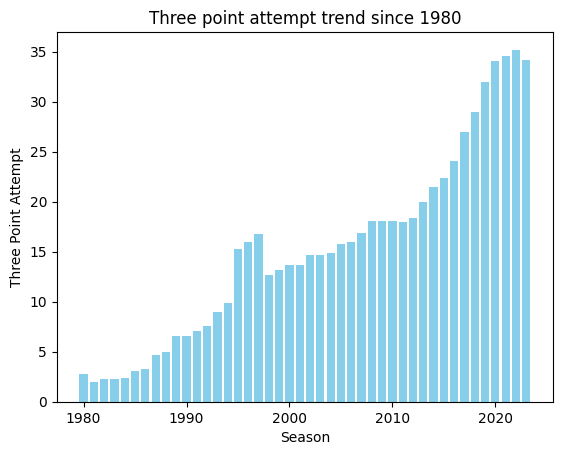

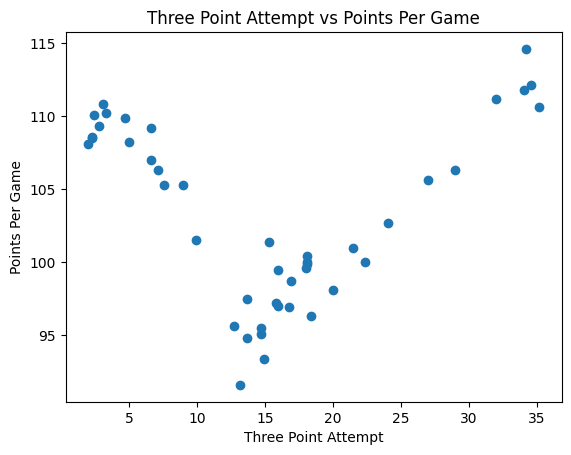

In [5]:
plt.bar(x = nba_df['Season'], height = nba_df['3PA'], color = 'skyblue')
plt.title('Three point attempt trend since 1980')
plt.xlabel('Season')
plt.ylabel('Three Point Attempt')
plt.show()

plt.scatter(x = nba_df['3PA'], y = nba_df['PTS'])
plt.title('Three Point Attempt vs Points Per Game')
plt.xlabel('Three Point Attempt')
plt.ylabel('Points Per Game')
plt.show()

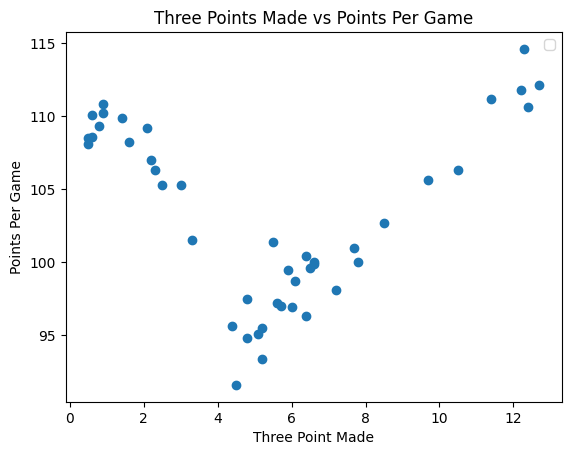

In [6]:
plt.scatter(x = nba_df['3P'], y = nba_df['PTS'])
plt.title('Three Points Made vs Points Per Game')
plt.xlabel('Three Point Made')
plt.ylabel('Points Per Game')
plt.legend()

In [7]:
nba_df = nba_df.drop(['Rk','Season','Lg','Age','Ht','Wt','G','MP' ], axis = 1) # Drop categorical data or data that are other wise useless, by columns
nba_df.head()

,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,41.9,88.2,12.3,34.2,18.5,23.6,10.4,33.0,43.4,25.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,40.6,88.1,12.4,35.2,16.9,21.9,10.3,34.1,44.5,24.6,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,41.2,88.4,12.7,34.6,17.0,21.8,9.8,34.5,44.3,24.8,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,40.9,88.8,12.2,34.1,17.9,23.1,10.1,34.8,44.8,24.4,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,41.1,89.2,11.4,32.0,17.7,23.1,10.3,34.8,45.2,24.6,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


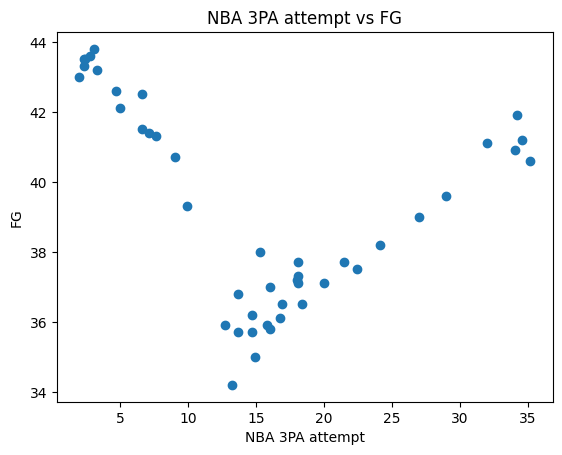

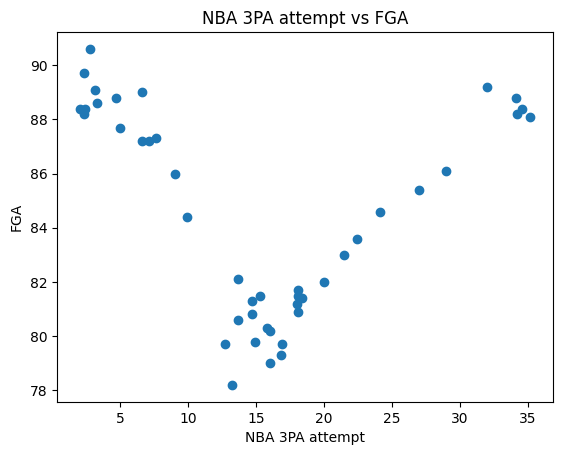

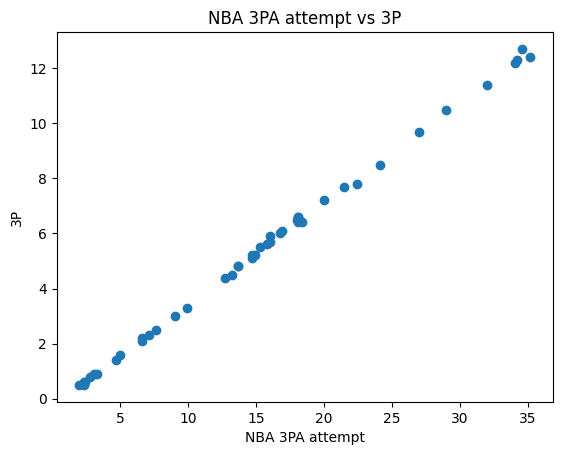

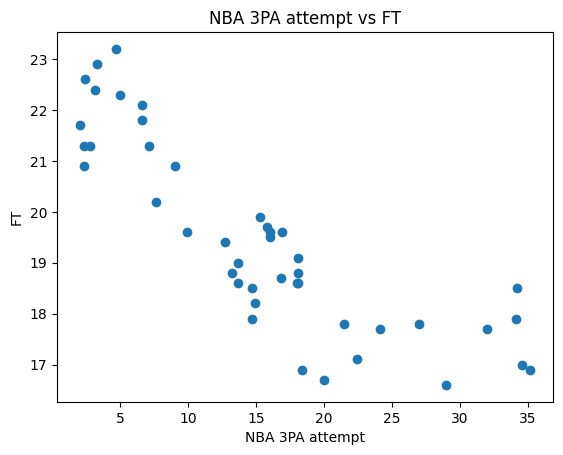

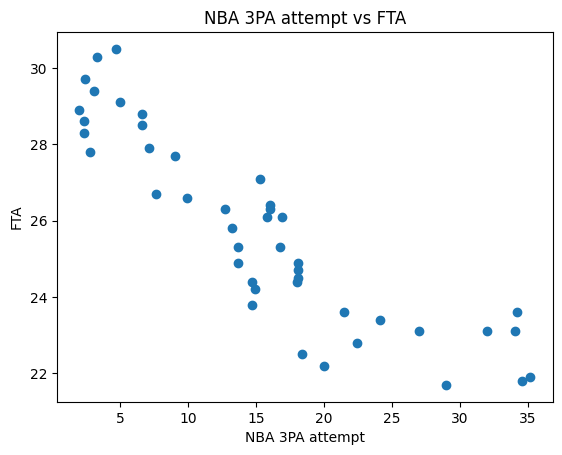

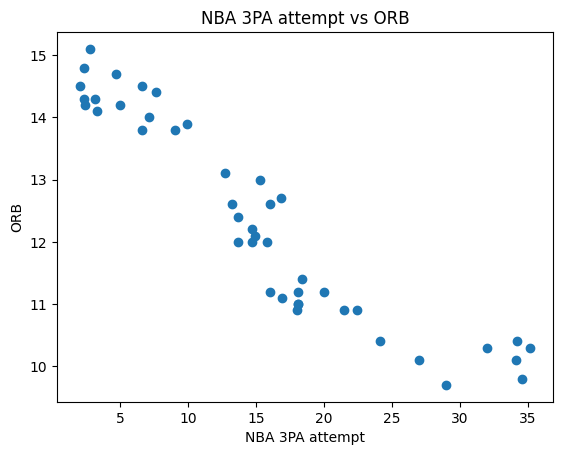

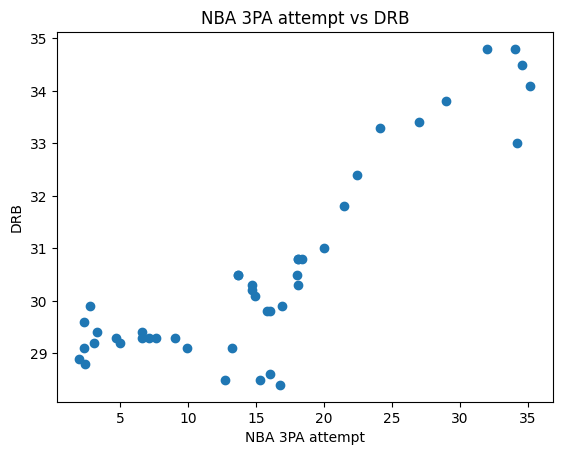

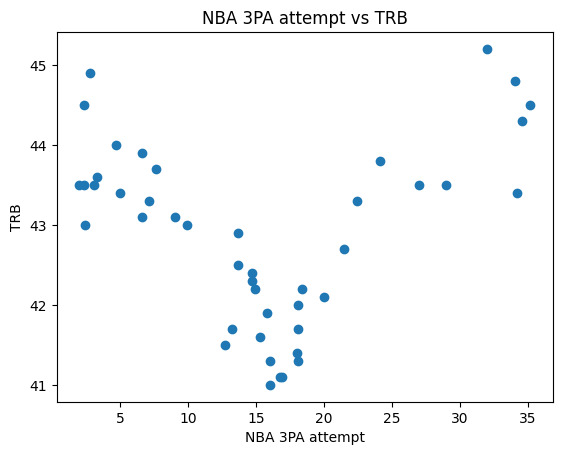

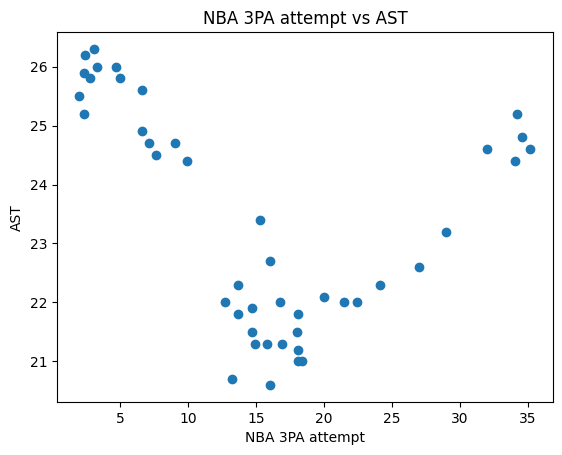

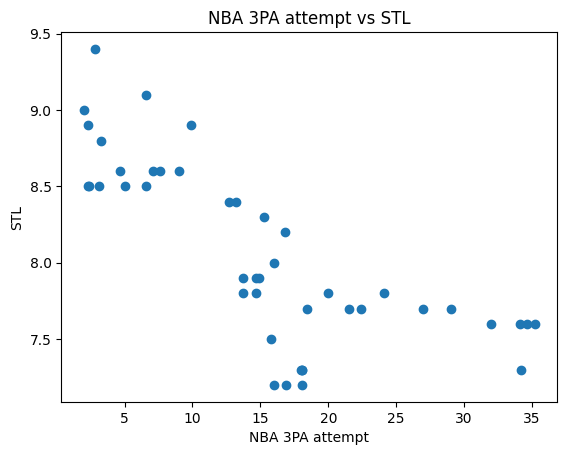

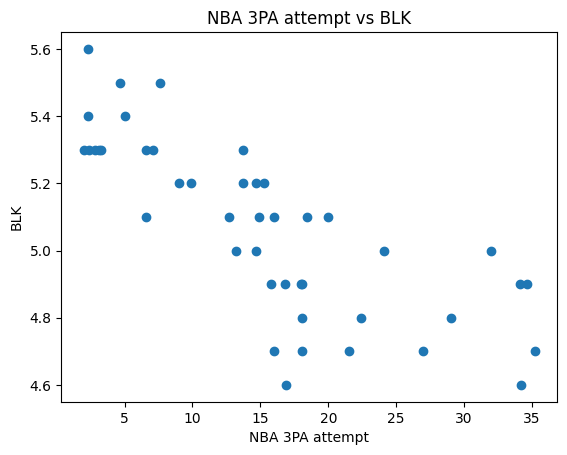

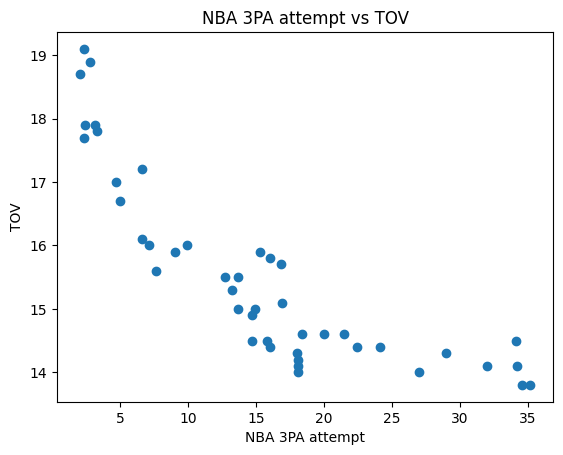

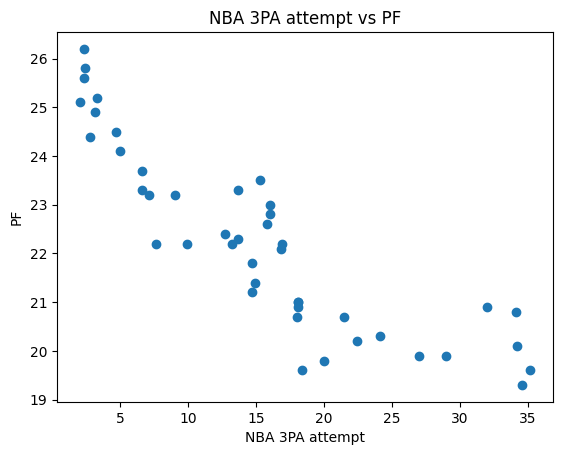

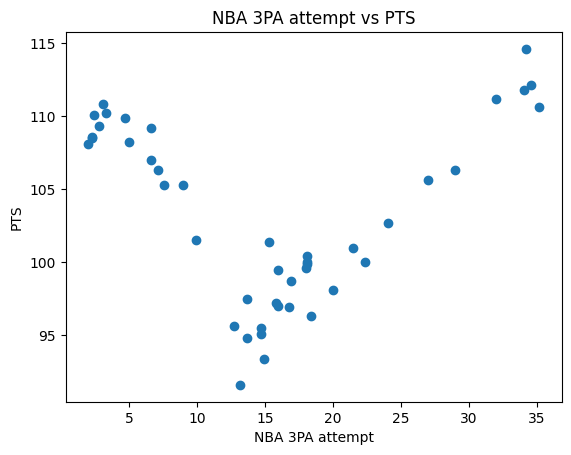

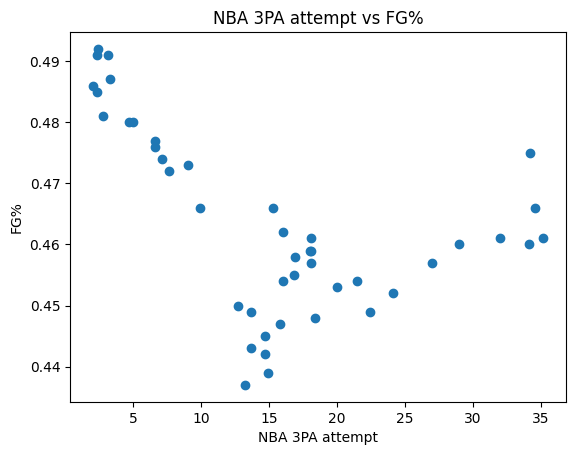

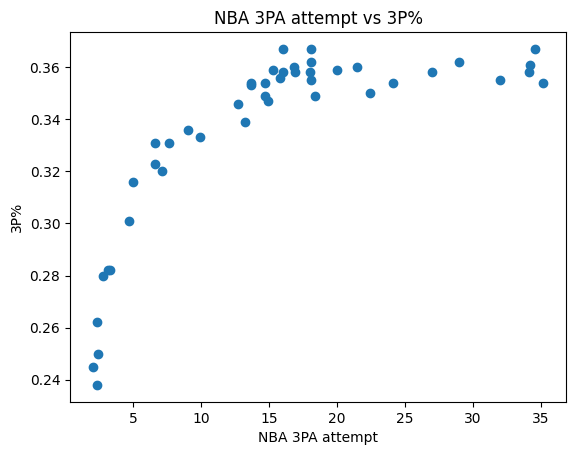

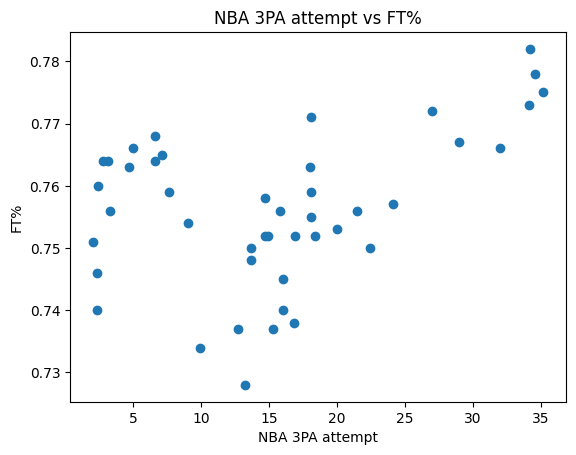

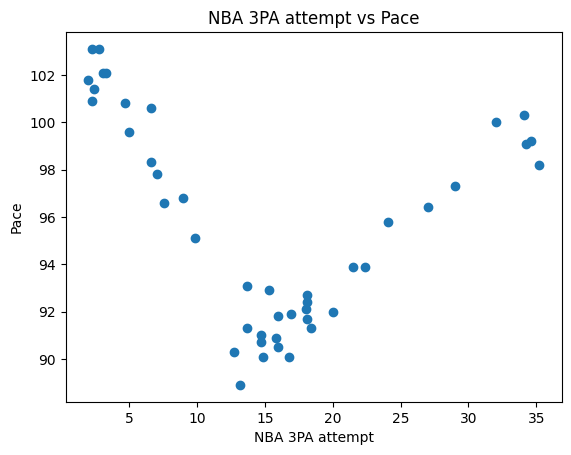

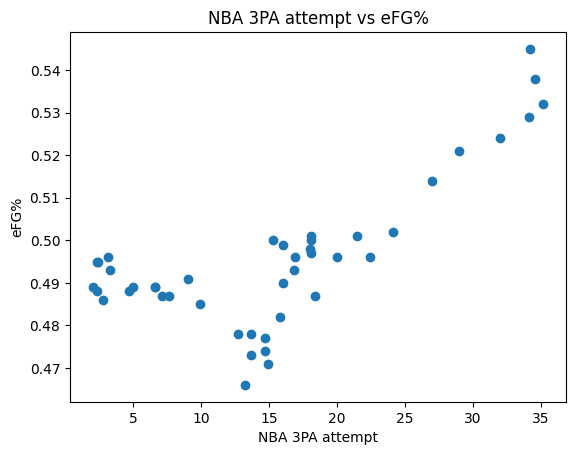

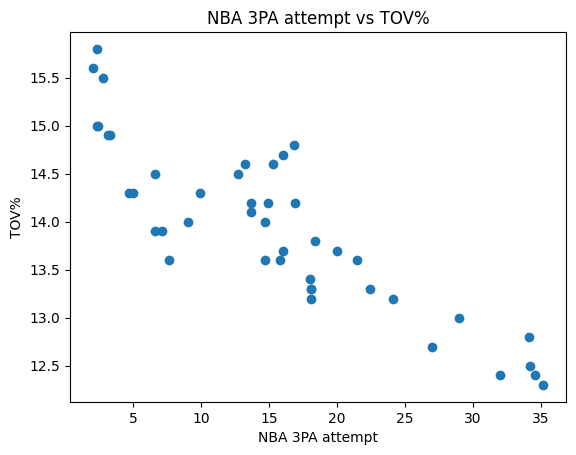

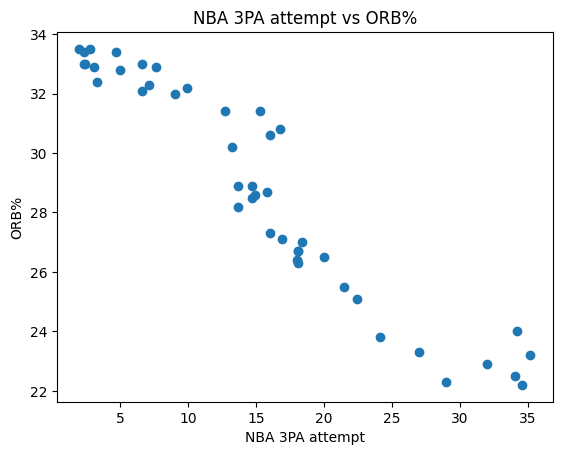

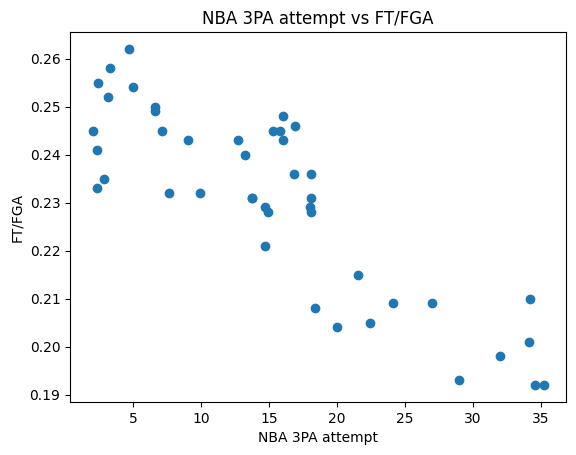

In [8]:
count = 0
for label in nba_df.columns[:-1]:
  if label == '3PA':
    count += 1 # basically just do nothing if label is '3PA'
  else: #look at 3P attempt vs other stats and plot its scatter plots
    plt.scatter(nba_df['3PA'], nba_df[label])
    plt.title('NBA 3PA attempt vs ' + label)
    plt.xlabel('NBA 3PA attempt')
    plt.ylabel(label)
    plt.show()

In [9]:
train, valid, test = np.split(nba_df.sample(frac = 1), [int(0.6*len(nba_df)), int(0.8*len(nba_df))])
#split into train, validation, and test datasets, 60-80% of data will be validation datasets, the rest 80-100% of data will be test datasets

In [10]:
def get_xy(dataframe, x_label, y_labels= None):
  dataframe = copy.deepcopy(dataframe)
  if y_labels is None: # if the default y_label value is None
    y = dataframe[[c for c in dataframe.columns if c!= x_label]].values #get all dataframe columns, other than the xlabel column
  else:
    if len(y_labels) ==1:
      y = dataframe[y_labels[0]].values.reshape(-1,1) #reshape (-1,1) to make it 2D
    else:
      y = dataframe[y_labels].values

  x = dataframe[x_label].values.reshape(-1,1)
  data = np.hstack((x,y))#horizontally stack together

  return data, x, y

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
d, x_train_pts, y_train_pts = get_xy(train, x_label = '3PA', y_labels = ['PTS'])
d, x_val_pts, y_val_pts = get_xy(valid, x_label = '3PA', y_labels = ['PTS'])
d, x_test_pts, y_test_pts = get_xy(test, x_label = '3PA', y_labels = ['PTS'])

In [13]:
pts_3pa_reg = LinearRegression()#run regression, train datasest
pts_3pa_reg.fit(x_train_pts, y_train_pts)

LinearRegression()

In [14]:
print(pts_3pa_reg.coef_)
print(pts_3pa_reg.intercept_)

[[-0.13903628]]
[103.52209366]


In [15]:
pts_3pa_reg.score(x_test_pts, y_test_pts) #test the train model

-0.8308946394350512

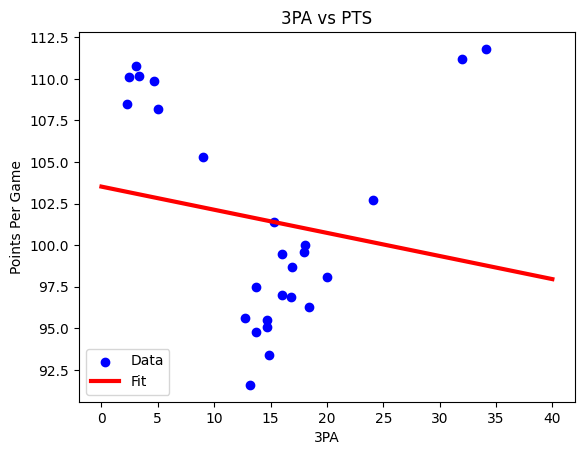

In [16]:
import tensorflow as tf
plt.scatter(x_train_pts, y_train_pts, label = 'Data',color = 'blue')
x = tf.linspace(0, 40, 100) #Generates evenly-spaced values in an interval along a given axis.
plt.plot(x, pts_3pa_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = 'red', linewidth = 3) # need to reshape 
plt.legend()
plt.title("3PA vs PTS")
plt.ylabel("Points Per Game")
plt.xlabel("3PA")
plt.show()

# Multiple Linear Regression

In [17]:
train, valid, test = np.split(nba_df.sample(frac = 1), [int(0.6*len(nba_df)), int(0.8*len(nba_df))])

In [18]:
d, x_train_all, y_train_all = get_xy(train, x_label = '3PA', y_labels = nba_df.columns[5:]) #variables after 
d, x_val_all, y_val_all = get_xy(valid, x_label = '3PA', y_labels = nba_df.columns[5:])
d, x_test_all, y_test_all = get_xy(test, x_label = '3PA', y_labels = nba_df.columns[5:])

In [19]:
all_reg = LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [20]:
all_reg.score(x_test_all, y_test_all)

0.3754587201484928

# Linear Regression with Scatter Graphs

In [21]:
nba_reg = LinearRegression()

R^2:  -0.1291659341135747


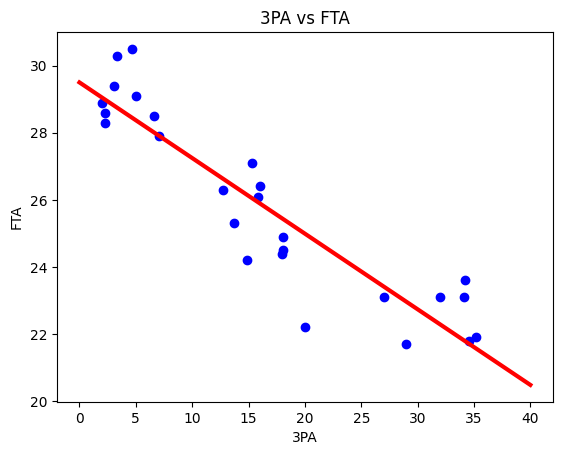

R^2:  0.7683136937917979


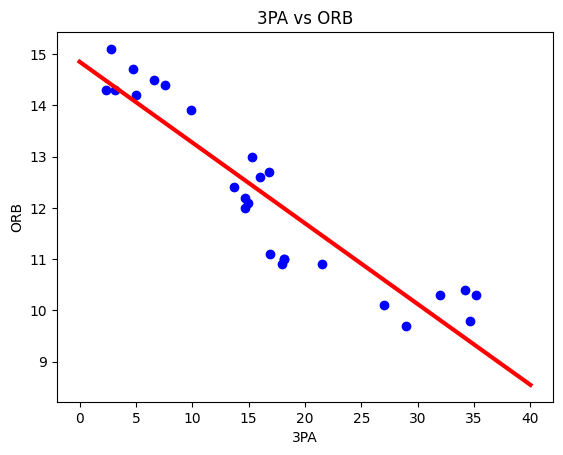

R^2:  0.6900497637451362


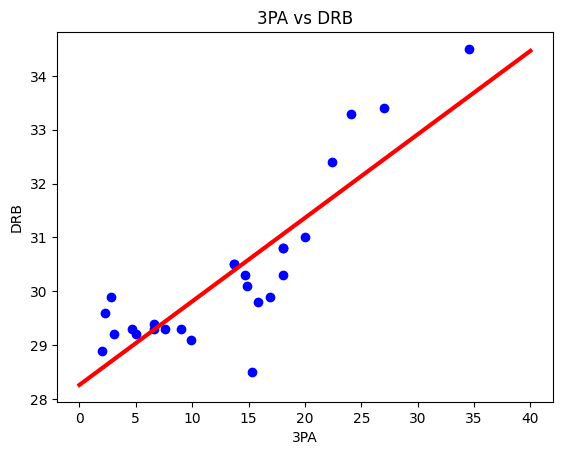

R^2:  -0.5252827602980636


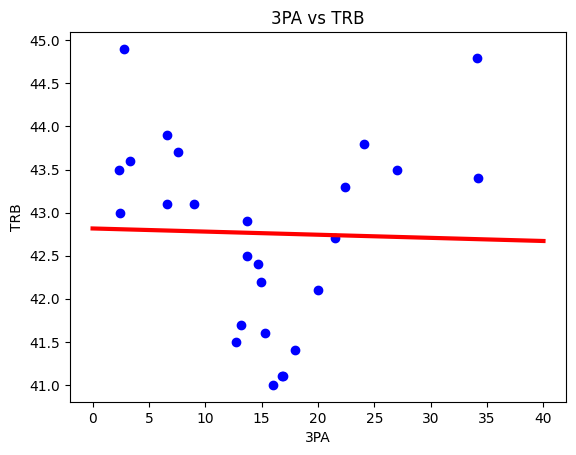

R^2:  -0.09483234193995593


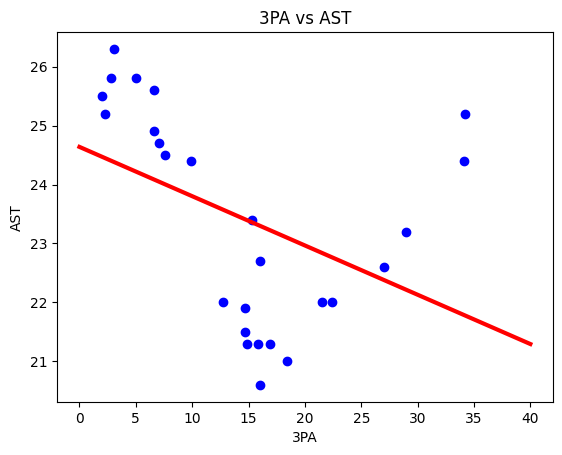

R^2:  0.5714180104234756


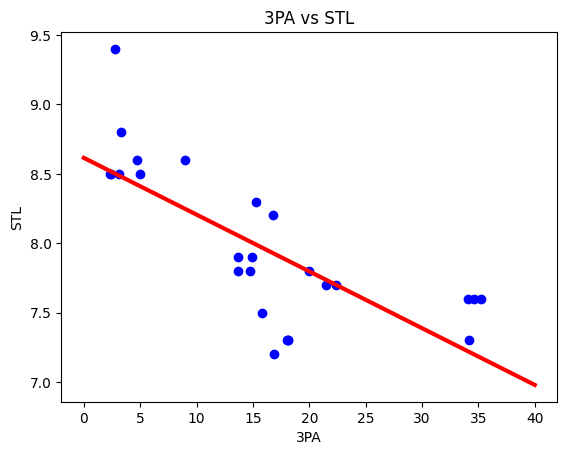

R^2:  0.708981557927354


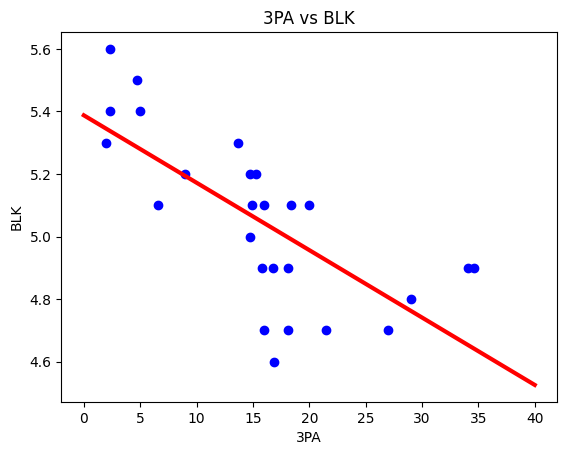

R^2:  0.743183746198535


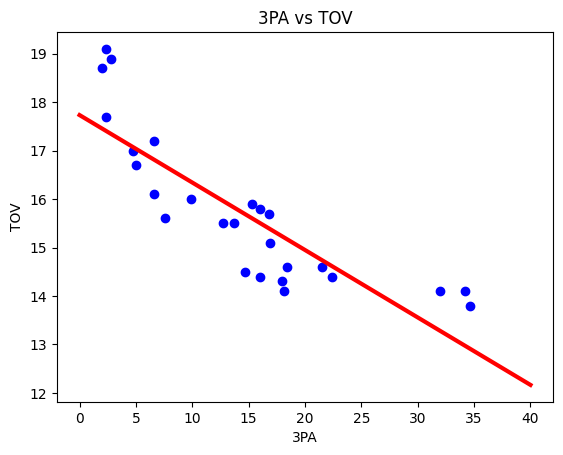

R^2:  0.8461721279910357


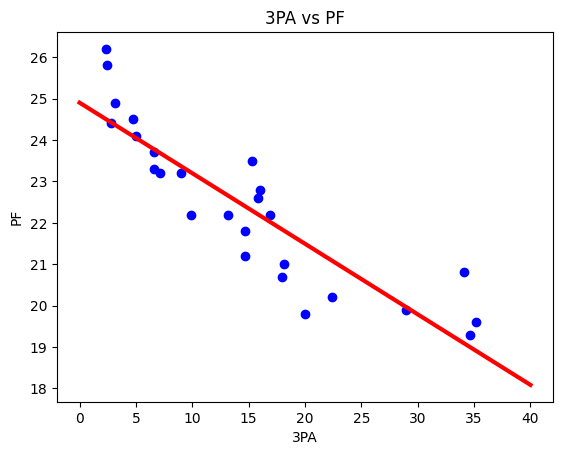

R^2:  -0.18552337062541668


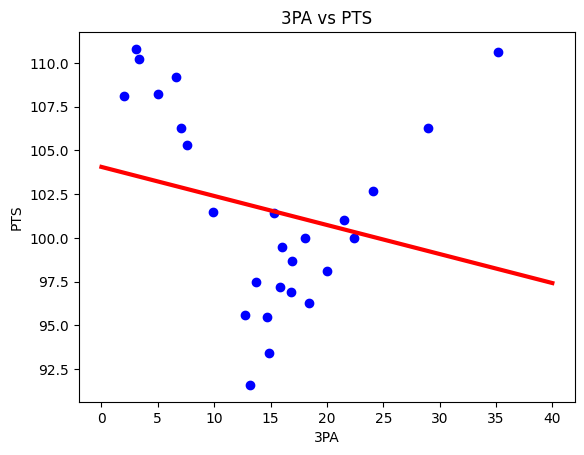

R^2:  -0.2201502376988369


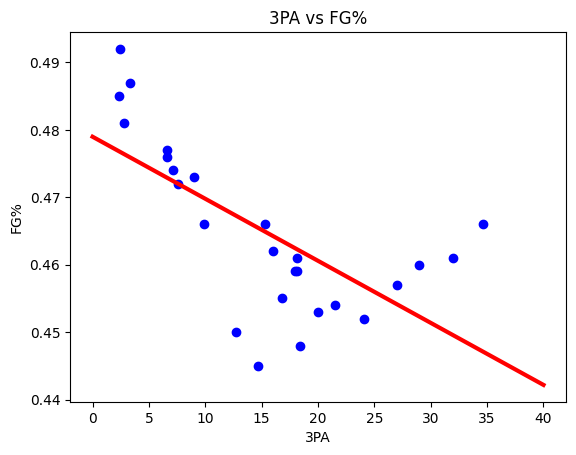

R^2:  0.2575459672645318


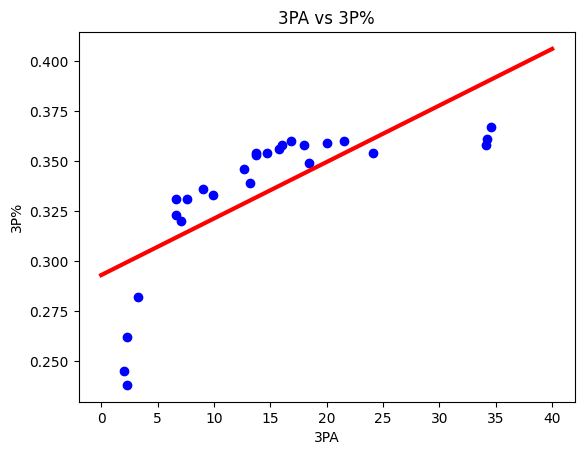

R^2:  0.16998096710787147


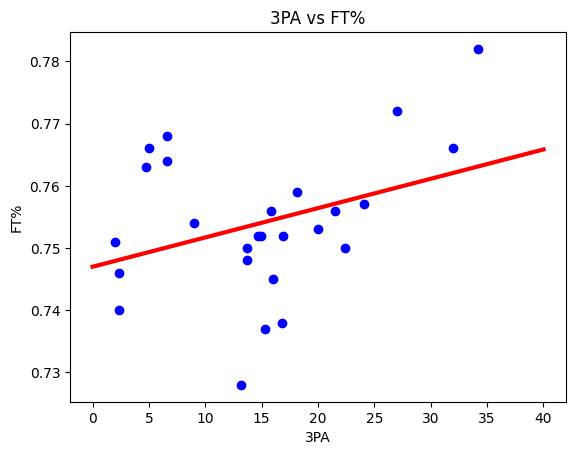

R^2:  0.16344225252374367


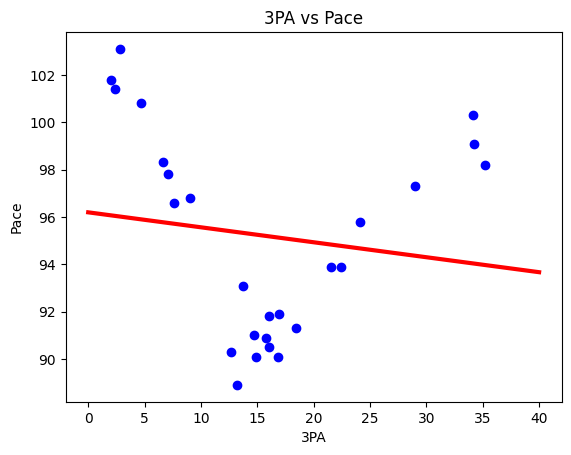

R^2:  0.5093474381567807


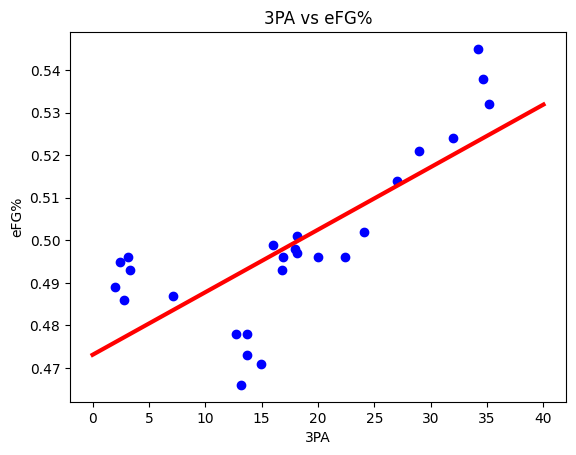

R^2:  0.7536213733039782


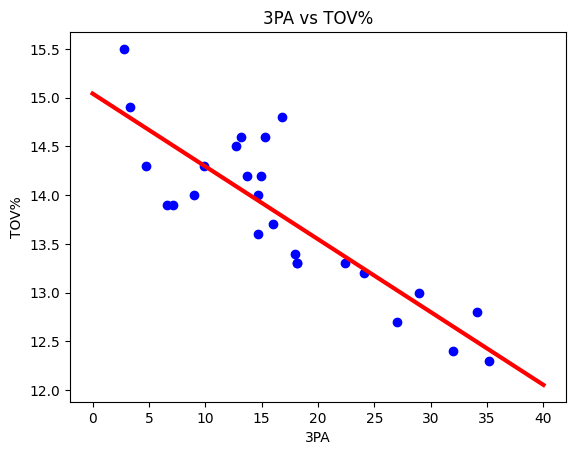

R^2:  0.9007694420308748


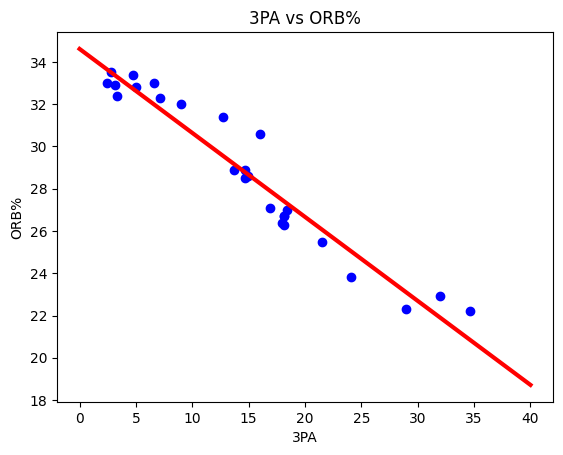

R^2:  0.482816190465992


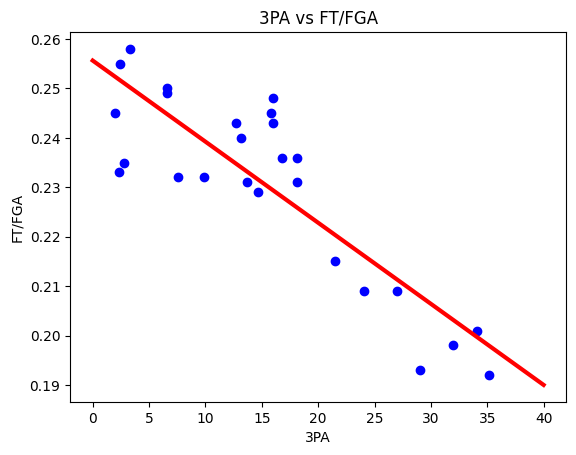

R^2:  0.11631630989970088


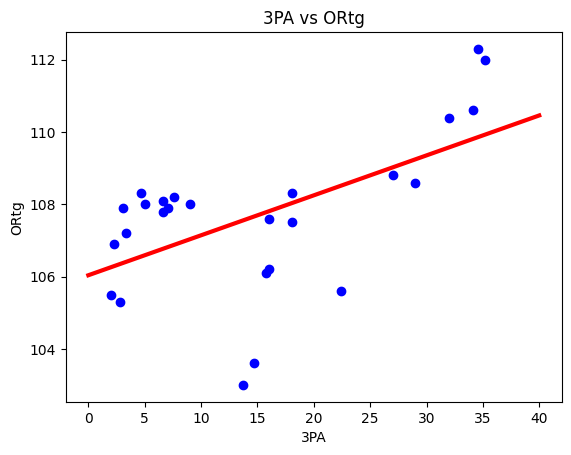

In [22]:
for label in nba_df.columns[5:]:
  train, valid, test = np.split(nba_df.sample(frac = 1), [int(0.6*len(nba_df)), int(0.8*len(nba_df))])
  d, x_train, y_train = get_xy(train, x_label = '3PA', y_labels = [label])
  d, x_val, y_val = get_xy(valid, x_label = '3PA', y_labels = [label])
  d, x_test, y_test = get_xy(test, x_label = '3PA', y_labels = [label])
  nba_reg.fit(x_train, y_train)
  print("R^2: ", nba_reg.score(x_test, y_test))
  plt.scatter(x_train, y_train, label = 'Data',color = 'blue')
  x = tf.linspace(0,40,100)
  plt.plot(x, nba_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = 'red', linewidth = 3)
  plt.title("3PA vs " + label)
  plt.ylabel(label)
  plt.xlabel("3PA")
  plt.show()

# Run a for loop and train model for 3PA vs each stats and generate the scatter plot and the results

# Query Data 


In [23]:
nba_df_query = pd.DataFrame(nba_df)
nba_df_query.head()

,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,41.9,88.2,12.3,34.2,18.5,23.6,10.4,33.0,43.4,25.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,40.6,88.1,12.4,35.2,16.9,21.9,10.3,34.1,44.5,24.6,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,41.2,88.4,12.7,34.6,17.0,21.8,9.8,34.5,44.3,24.8,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,40.9,88.8,12.2,34.1,17.9,23.1,10.1,34.8,44.8,24.4,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,41.1,89.2,11.4,32.0,17.7,23.1,10.3,34.8,45.2,24.6,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


In [24]:
#Qeury datasets that contain points below 105 and 3PA 
new_result = nba_df_query.query("`PTS` <= 105 and `3PA` >= 10").copy()
new_result.head()

,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
7,38.2,84.6,8.5,24.1,17.7,23.4,10.4,33.3,43.8,22.3,...,102.7,0.452,0.354,0.757,95.8,0.502,13.2,23.8,0.209,106.4
8,37.5,83.6,7.8,22.4,17.1,22.8,10.9,32.4,43.3,22.0,...,100.0,0.449,0.350,0.750,93.9,0.496,13.3,25.1,0.205,105.6
9,37.7,83.0,7.7,21.5,17.8,23.6,10.9,31.8,42.7,22.0,...,101.0,0.454,0.360,0.756,93.9,0.501,13.6,25.5,0.215,106.6
10,37.1,82.0,7.2,20.0,16.7,22.2,11.2,31.0,42.1,22.1,...,98.1,0.453,0.359,0.753,92.0,0.496,13.7,26.5,0.204,105.8
11,36.5,81.4,6.4,18.4,16.9,22.5,11.4,30.8,42.2,21.0,...,96.3,0.448,0.349,0.752,91.3,0.487,13.8,27.0,0.208,104.6


In [25]:
train, valid, test = np.split(new_result.sample(frac = 1), [int(0.6*len(new_result)), int(0.8*len(new_result))])

In [26]:
d, x_train_pts3, y_train_pts3 = get_xy(train, x_label = '3PA', y_labels = ['PTS'])
d, x_val_pts3, y_val_pts3 = get_xy(valid, x_label = '3PA', y_labels = ['PTS'])
d, x_test_pts3, y_test_pts3 = get_xy(test, x_label = '3PA', y_labels = ['PTS'])


In [27]:
pts3_3pa_reg = LinearRegression()
pts3_3pa_reg.fit(x_train_pts3, y_train_pts3)


LinearRegression()

In [28]:
pts3_3pa_reg.score(x_test_pts3, y_test_pts3)

0.605319209256799

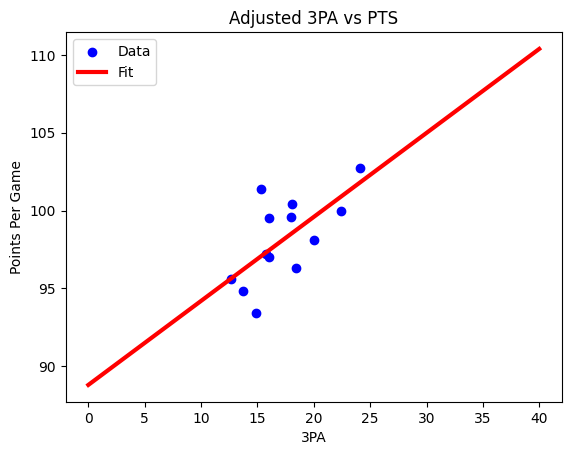

In [29]:
import tensorflow as tf
plt.scatter(x_train_pts3, y_train_pts3, label = 'Data',color = 'blue')
x = tf.linspace(0, 40, 100)
plt.plot(x, pts3_3pa_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = 'red', linewidth = 3)
plt.legend()
plt.title("Adjusted 3PA vs PTS")
plt.ylabel("Points Per Game")
plt.xlabel("3PA")
plt.show()

In [124]:
ncaa_df = pd.read_csv("/content/bigeastncaabasketball.csv")
ncaa_df.head()

,id,year,rank,school,games,wins,losses,win_percentage,conference_wins,conference_losses,...,offensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,opponent_points,simple_rating
0,1,2021,1,Villanova,38,30,8,0.789,16,4,...,10.3,34.8,11.9,6.0,2.2,9.9,14.9,71.7,62.7,19.31
1,2,2021,2,Providence,33,27,6,0.818,14,3,...,10.5,37.6,13.2,5.0,3.7,11.4,16.0,71.5,66.2,13.08
2,3,2021,3,UConn,33,23,10,0.697,13,6,...,13.8,40.4,14.0,5.9,6.4,11.8,16.8,74.8,65.3,16.40
3,4,2021,4,Creighton,35,23,12,0.657,12,7,...,9.6,38.1,13.3,5.5,4.3,14.1,13.6,69.2,66.4,11.34
4,5,2021,5,Marquette,32,19,13,0.594,11,8,...,7.8,34.8,16.0,7.8,5.2,12.4,17.4,74.0,71.6,11.36


In [125]:
ncaa_df = ncaa_df.drop(['id','rank','conference_wins','conference_losses','home_wins','home_losses',
                        'away_wins','away_losses', 'defensive_rating'], axis = 1)
ncaa_df.head()

,year,school,games,wins,losses,win_percentage,offensive_rating,net_rating,field_goals,field_goal_attempts,...,offensive_rebounds,total_rebounds,assists,steals,blocks,turnovers,personal_fouls,points,opponent_points,simple_rating
0,2021,Villanova,38,30,8,0.789,112.4,14.1,24.3,56.1,...,10.3,34.8,11.9,6.0,2.2,9.9,14.9,71.7,62.7,19.31
1,2021,Providence,33,27,6,0.818,106.4,7.9,24.5,56.3,...,10.5,37.6,13.2,5.0,3.7,11.4,16.0,71.5,66.2,13.08
2,2021,UConn,33,23,10,0.697,109.9,14.0,26.7,61.2,...,13.8,40.4,14.0,5.9,6.4,11.8,16.8,74.8,65.3,16.40
3,2021,Creighton,35,23,12,0.657,100.5,4.1,25.6,57.2,...,9.6,38.1,13.3,5.5,4.3,14.1,13.6,69.2,66.4,11.34
4,2021,Marquette,32,19,13,0.594,102.7,3.3,26.9,59.8,...,7.8,34.8,16.0,7.8,5.2,12.4,17.4,74.0,71.6,11.36


In [126]:
ncaa_df_3pta = ncaa_df.groupby(['year'])['3_pointer_attempts'].mean()
ncaa_df_3pt = ncaa_df.groupby(['year'])['3_pointers'].mean()
ncaa_df_fga = ncaa_df.groupby(['year'])['field_goal_attempts'].mean()
ncaa_df_fta = ncaa_df.groupby(['year'])['free_throw_attempts'].mean()
ncaa_df_or = ncaa_df.groupby(['year'])['offensive_rebounds'].mean()
ncaa_df_r = ncaa_df.groupby(['year'])['total_rebounds'].mean()
ncaa_df_assist = ncaa_df.groupby(['year'])['assists'].mean()
ncaa_df_steal = ncaa_df.groupby(['year'])['steals'].mean()
ncaa_df_block = ncaa_df.groupby(['year'])['blocks'].mean()
ncaa_df_turnovers = ncaa_df.groupby(['year'])['turnovers'].mean()
ncaa_df_pfouls = ncaa_df.groupby(['year'])['personal_fouls'].mean()
ncaa_df_pts = ncaa_df.groupby(['year'])['points'].mean()


In [127]:
ncaa_df_new = pd.DataFrame()
ncaa_df_new['points'] = ncaa_df_pts
ncaa_df_new['3_pointer_attemps'] = ncaa_df_3pta
ncaa_df_new['3Pointers'] = ncaa_df_3pt
ncaa_df_new['field_goal_attemps'] = ncaa_df_fga
ncaa_df_new['free_throw_attemps'] = ncaa_df_fta
ncaa_df_new['offensive_rebounds'] = ncaa_df_or
ncaa_df_new['total_rebounds'] = ncaa_df_r
ncaa_df_new['assists'] = ncaa_df_assist
ncaa_df_new['steal'] = ncaa_df_steal
ncaa_df_new['block'] = ncaa_df_block
ncaa_df_new['turnovers'] = ncaa_df_turnovers
ncaa_df_new['personal_fouls'] = ncaa_df_pfouls
ncaa_df_new['years'] = np.arange(start = 1979, stop = 2022, step = 1)
 


In [128]:
ncaa_df_new = ncaa_df_new.drop(["offensive_rebounds"], axis = 1)
ncaa_df_new = ncaa_df_new.iloc[7:]
ncaa_df_new

,points,3_pointer_attemps,3Pointers,field_goal_attemps,free_throw_attemps,total_rebounds,assists,steal,block,turnovers,personal_fouls,years
year,,,,,,,,,,,,
1986,75.322222,8.900000,3.411111,57.977778,24.244444,36.511111,15.055556,6.622222,3.666667,13.822222,20.622222,1986
1987,75.588889,10.000000,3.877778,57.655556,23.444444,36.066667,15.677778,7.433333,3.833333,14.400000,19.933333,1987
1988,78.188889,11.611111,4.422222,58.488889,24.822222,36.744444,16.500000,7.822222,4.188889,14.244444,20.522222,1988
1989,77.366667,12.044444,4.411111,58.144444,27.000000,38.555556,15.488889,8.244444,4.333333,15.577778,21.544444,1989
1990,76.711111,13.000000,4.766667,59.388889,25.900000,38.088889,14.922222,8.466667,4.311111,15.522222,20.788889,1990
1991,72.970000,14.390000,5.060000,56.200000,26.840000,37.210000,13.880000,7.530000,4.370000,15.290000,21.330000,1991
1992,73.900000,14.190000,4.990000,58.060000,23.420000,37.040000,15.290000,8.010000,4.060000,15.400000,19.810000,1992
1993,75.630000,15.950000,5.480000,60.260000,23.790000,39.080000,15.730000,8.080000,4.440000,15.400000,19.300000,1993
1994,76.490000,17.000000,5.850000,61.260000,22.610000,38.600000,15.430000,8.720000,4.020000,16.800000,19.160000,1994


There's an NA value in personal fouls, so we decide to fill in the NA value 

---



In [129]:
'''years = [1996, 1997, 1998, 1999, 2000]
#ncaa_df_new = ncaa_df_new.set_index('years')
df = ncaa_df_new[ncaa_df_new['years'].isin(years)]

# Compute the rolling 5-year mean and shift it by 1 index
rolling_avg = df['personal_fouls'].rolling(window=5, min_periods=1).mean()

# Fill missing values with the shifted rolling average'''
ncaa_df_new['personal_fouls'] = ncaa_df_new['personal_fouls'].fillna(ncaa_df_new['personal_fouls'].mean())

In [131]:
ncaa_reg = LinearRegression()

R^2:  0.9702451486389579


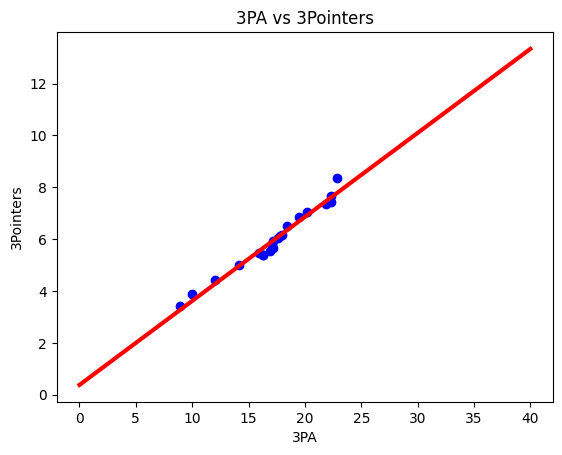

R^2:  -0.18049849592118417


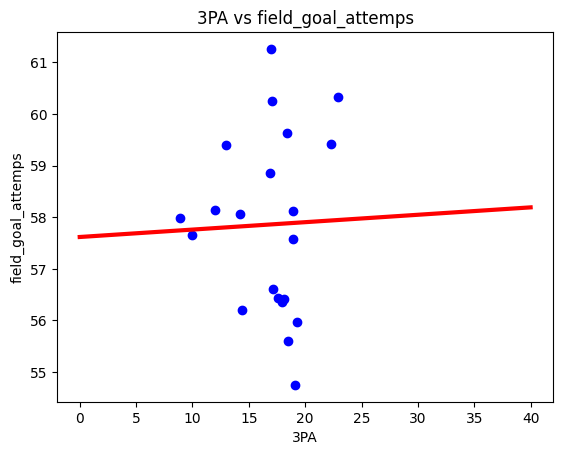

R^2:  0.49726650610584167


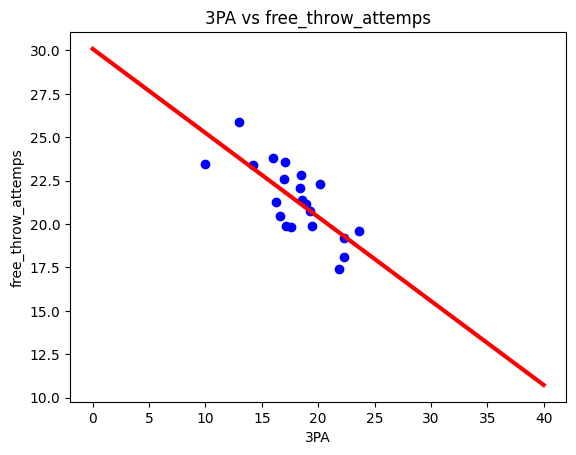

R^2:  -1.2707252297862066


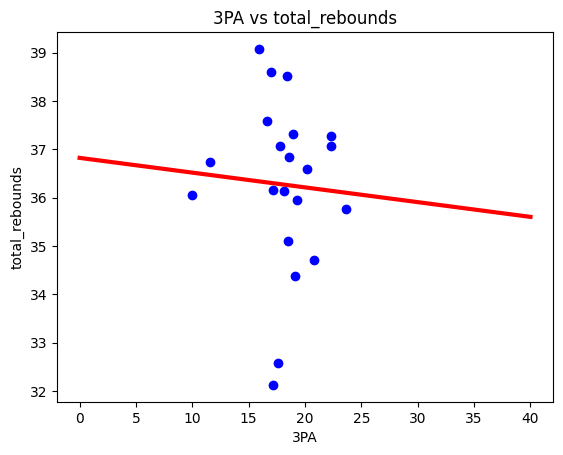

R^2:  -0.3724987846106531


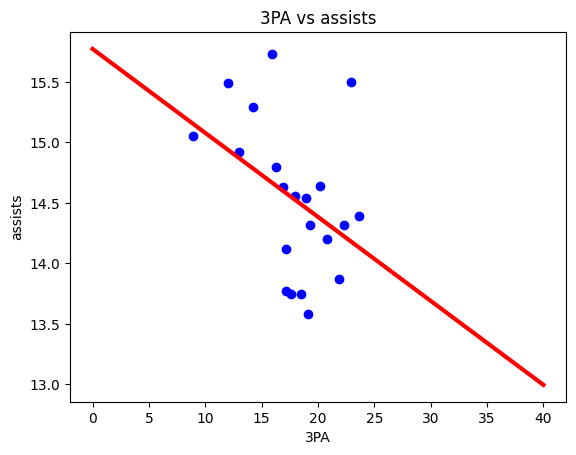

R^2:  0.6568379160671507


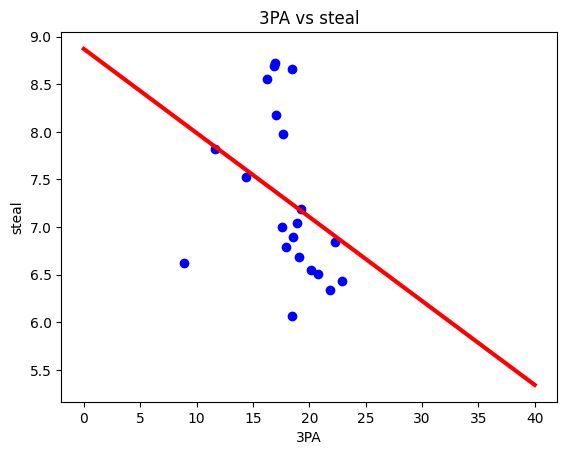

R^2:  -0.054448123801784654


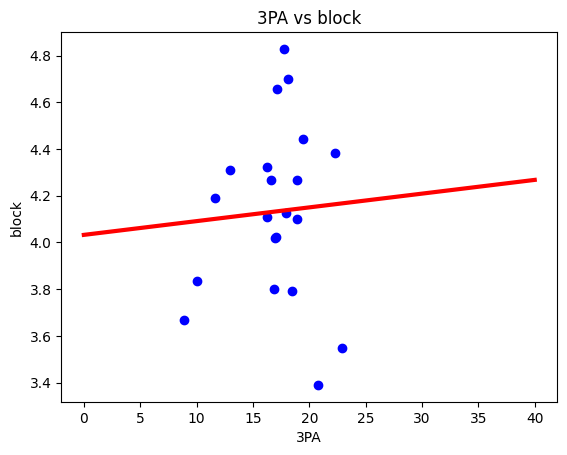

R^2:  0.32699026615118176


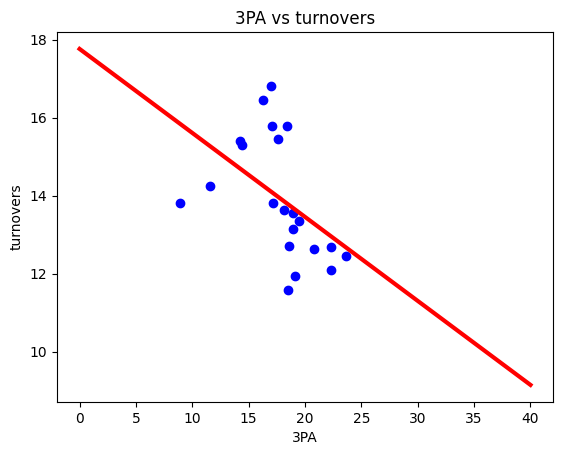

R^2:  0.33735046278133307


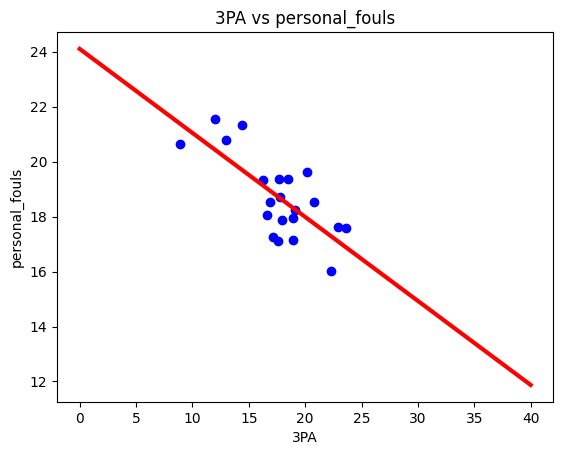

In [132]:
for label in ncaa_df_new.columns[2:-1]:
  train, valid, test = np.split(ncaa_df_new.sample(frac = 1), [int(0.6*len(ncaa_df_new)), int(0.8*len(ncaa_df_new))])
  d, x_train, y_train = get_xy(train, x_label = '3_pointer_attemps', y_labels = [label])
  d, x_val, y_val = get_xy(valid, x_label = '3_pointer_attemps', y_labels = [label])
  d, x_test, y_test = get_xy(test, x_label = '3_pointer_attemps', y_labels = [label])
  ncaa_reg.fit(x_train, y_train)
  print("R^2: ", ncaa_reg.score(x_test, y_test))
  plt.scatter(x_train, y_train, label = 'Data',color = 'blue')
  x = tf.linspace(0,40,100)
  plt.plot(x, ncaa_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = 'red', linewidth = 3)
  plt.title("3PA vs " + label)
  plt.ylabel(label)
  plt.xlabel("3PA")
  plt.show()

# Run a for loop and train model for 3PA vs each stats and generate the scatter plot and the results

In [ ]:
'''ncaa_df_3pta = ncaa_df.groupby(['year'])['3_pointer_attempts'].mean()
ncaa_df_3pt = ncaa_df.groupby(['year'])['3_pointers'].mean()
ncaa_df_fga = ncaa_df.groupby(['year'])['field_goal_attempts'].mean()
ncaa_df_'''

In [ ]:
 #pip install sqlalchemy 

In [ ]:
# import sql library
#from sqlalchemy import create_engine

#nba_df.head()
#engine = create_engine('sqlite://', echo = False)
#nba_df.to_sql('NBA_Data', con = engine)

#print(engine.execute("SELECT * FROM NBA_Data").fetchall())


In [ ]:
#df_ex = pd.read_sql_query("SELECT * FROM NBA_Data WHERE 3P > 10", 
                          #con = engine)
#print(df_ex)
